## 라이브러리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import csv
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'NanumGothic'

## 작품 선택하기

In [2]:
import os
path = '../script'

# 다큐멘터리(0), 드라마(1), 영화(2) 선택
category = 2
if category == 0:
    path = path + '/Documentary'
elif category == 1:
    path = path + '/Drama'
else:
    path = path + '/Movie'

_list = os.listdir(path)
file_list = []
for file in _list:
    if file.startswith('.'): continue
    file_list.append(file)

print(len(file_list), file_list[:5])

46 ['The.Intern', 'The.Departed', 'Ben.Platt.Live.from.Radio.City.Music.HallBen.Platt.Live.from.Radio.City.Music.Hall', "It's.Complicated", 'Baby.DriverBaby.Driver']


## 여기서 작품 선택합니다 꼭!!

In [3]:
# 바로 위 코드에서 file_list를 참고하여 작품 선택
title = file_list[0]

file_name = title + '.WEBRip.Netflix.en[cc]'
print(f'{path}/{title}/{file_name}')

../script/Movie/The.Intern/The.Intern.WEBRip.Netflix.en[cc]


## CSV 파일 읽기

In [4]:
data = pd.read_csv(f'{path}/{title}/{file_name}.csv')

In [5]:
script = data

## 데이터 정보

In [6]:
script.info()
script.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   start   2421 non-null   object
 1   end     2421 non-null   object
 2   script  2421 non-null   object
dtypes: object(3)
memory usage: 56.9+ KB


,start,end,script
0,00:01:09.569,00:01:12.447,"['BEN:', 'Freud', 'said,', '""Love', 'and', 'wo..."
1,00:01:12.614,00:01:14.324,"['""That\'s', 'all', 'there', 'is.""']"
2,00:01:14.491,00:01:17.327,"['Well,', ""I'm"", 'retired,', 'and', 'my', 'wif..."
3,00:01:17.494,00:01:18.745,"['As', 'you', 'can', 'imagine,', ""that's"", 'gi..."
4,00:01:18.911,00:01:20.663,"['some', 'time', 'on', 'my', 'hands.']"


## DataFrame to Text

In [7]:
list_script = []
list_script.extend(data for data in script['script'])
text_script = ' '.join(list_script)
text_script[-500:]

'u\', \'know\', \'where\', \'Ben\', \'is?\'] [\'Hi.\'] [\'Okay.\'] ["-I\'m", \'so\', \'sorry\', \'to\', \'interrupt.\', "-That\'s", \'okay.\', \'Here.\'] [\'Extend\', \'your\', \'left\', \'arm,\', \'Jules.\'] [\'-Left\', \'knee\', \'up.\', \'-Mmm-hmm.\'] [\'Breathe\', \'and\', \'relax\', \'for\', \'inner\', \'balance.\'] [\'-Am\', \'I\', \'doing\', \'it\', \'right?\', \'-Almost.\'] [\'Got\', \'something\', \'good\', \'to\', \'tell\', \'you.\'] [\'Great.\', \'Tell\', \'me\', \'when\', "we\'re", \'done.\'] [\'Breathe\', \'deeply,\', \'Jules.\'] ["That\'s", \'it,\', \'out\', \'there.\'] [\'This\', \'up.\']'

## 영문자 이외 문자는 공백으로 변환

In [8]:
import re

# A AND B 
# = not (not A OR not B)
# A AND not B
# = not (not A OR B)

# 영문자 이외 문자는 공백으로 변환
first_process_script = re.sub('[^a-zA-Z\-]', ' ', text_script)    # 대쉬(-)를 제외한 모든 특수문자 변환

only_english_script = ''
for i in range(len(first_process_script)):
    if first_process_script[i] == '-':
        if first_process_script[i-1].isalpha() and first_process_script[i+1].isalpha():
            only_english_script += '-'
        else:
            only_english_script += ''
    else:
        only_english_script += first_process_script[i]

only_english_script[-500:]

# for i in range(len(only_english_script)):
#     if only_english_script[i] == '-':
#         print(only_english_script[i-20:i+20])


'    you    know    where    Ben    is      Hi      Okay      I m    so    sorry    to    interrupt     That s    okay     Here      Extend    your    left    arm     Jules      Left    knee    up     Mmm-hmm      Breathe    and    relax    for    inner    balance      Am    I    doing    it    right     Almost      Got    something    good    to    tell    you      Great     Tell    me    when    we re    done      Breathe    deeply     Jules      That s    it     out    there      This    up   '

### 고유명사 제거

관련 nlkt import

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hanbyul/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/hanbyul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

토큰화 및 태깅 (VBP = 동사, RB = 부사, VBG = 현재부사, IN = 전치사, NPP = 고유명사, NNS = 복수형 명사
CC = 접속사, DT = 관사)

In [10]:
word_tokenize_script = word_tokenize(only_english_script)
tag_script = pos_tag(word_tokenize_script)


고유명사 NPP 제거 작업

In [11]:
only_english_script = ''
for word in tag_script:
    if word[1] != 'NNP':
        only_english_script = only_english_script + ' ' +word[0]

## 소문자로 변환

In [12]:
# 소문자 변환
no_capitals_script = only_english_script.lower().split()
print(len(no_capitals_script), '\n', no_capitals_script[:50])

13526 
 ['said', 'and', 'work', 'work', 'and', 'love', 'that', 's', 'all', 'there', 'is', 'i', 'm', 'retired', 'and', 'my', 'wife', 'is', 'dead', 'as', 'you', 'can', 'imagine', 'that', 's', 'given', 'me', 'some', 'time', 'on', 'my', 'hands', 'my', 'wife', 's', 'been', 'gone', 'for', 'three', 'and', 'a', 'half', 'years', 'i', 'miss', 'her', 'in', 'every', 'way', 'and']


# nltk 설치!! 만약에 설치되어 있으면 주석 처리하기!!

In [13]:
# 설치 되었으면 주석 처리하기
# !pip3 install nltk

In [14]:
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hanbyul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 불용어 제거

In [15]:
 # 불용어 제거
stops = set(stopwords.words('english'))
no_stops_script = [word for word in no_capitals_script if not word in stops]
len(no_stops_script)

5396

list -> DataFrame

In [16]:
df_script = pd.DataFrame(no_stops_script)
result_script = pd.DataFrame(df_script.value_counts())
result_script = result_script.rename_axis('Word').rename(columns={0: 'counts'})
result_script

,counts
Word,
know,123
like,93
na,87
one,67
good,63
...,...
hump,1
hungry,1
hurt,1


## 파일로 저장

In [17]:
result_script.to_csv(f'{path}/{title}/unique_words_{file_name}.csv', sep=',')

## 저장한 파일 확인

In [18]:
data_check = pd.read_csv(f'{path}/{title}/unique_words_{file_name}.csv')
data_check

,Word,counts
0,know,123
1,like,93
2,na,87
3,one,67
4,good,63
...,...,...
1559,hump,1
1560,hungry,1
1561,hurt,1
1562,icebreaker,1


## 정제된 대본 데이터 불러오기

In [19]:
new_data = pd.read_csv(f'{path}/{title}/unique_words_{file_name}.csv')
script_data = new_data
script_data.info()
display(script_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    1564 non-null   object
 1   counts  1564 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.6+ KB


,Word,counts
0,know,123
1,like,93
2,na,87
3,one,67
4,good,63
...,...,...
1559,hump,1
1560,hungry,1
1561,hurt,1
1562,icebreaker,1


## 기준 단어 데이터 불러오기

In [20]:
path = '../'
words = pd.read_csv(f'{path}/words/word - AllLevels.csv')
words

FileNotFoundError: [Errno 2] No such file or directory: '..//words/word - AllLevels.csv'

## 단어 데이터에서 레벨이 없는 단어들은 999로 처리

In [ ]:
words['word'] = words['word'].fillna(999).astype('int64')
words = words.rename(columns={'word':'level', 'level':'Word'})
words

,level,Word
0,1,TRUE
1,1,zero
2,1,young
3,1,you
4,1,yet
...,...,...
24836,999,vaunted
24837,999,vehemence
24838,999,victimizer
24839,999,washout


## 대본과 매칭되는 단어가 있다면 레벨 입력하고, 대본과 매칭되는 단어가 없다면 0 입력

In [ ]:
matched_data = pd.merge(script_data, words, how='left', on='Word')
matched_data.info()
matched_data = matched_data.fillna(0)
matched_data['level'] = matched_data['level'].astype('int64')
matched_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1550 entries, 0 to 1549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Word    1550 non-null   object 
 1   counts  1550 non-null   int64  
 2   level   1053 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 48.4+ KB


,Word,counts,level
0,oh,181,0
1,yeah,124,999
2,okay,107,999
3,um,81,0
4,uh,65,0
...,...,...,...
1545,diagnosed,1,0
1546,office,1,1
1547,often,1,1
1548,devil,1,4


## result 데이터 프레임 생성

In [ ]:
result = pd.DataFrame(matched_data.value_counts('level'))
result = result.rename(columns={0: 'count'})
result

,count
level,
1,499
0,497
999,298
2,133
3,58
4,39
5,26


In [ ]:
result['rate'] = [i / len(script_data) * 100 for i in result['count']]
result = result.sort_index().reset_index()
result

,level,count,rate
0,0,497,32.064516
1,1,499,32.193548
2,2,133,8.580645
3,3,58,3.741935
4,4,39,2.516129
5,5,26,1.677419
6,999,298,19.225806


<AxesSubplot:xlabel='level'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


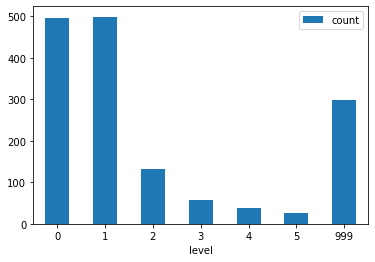

In [ ]:
result.plot(x='level', y='count', kind='bar', rot=0)

## 단어 데이터에 있다면 True, 없다면 False인 matched 컬럼

In [ ]:
matched_data['matched'] = [True if i in [1, 2, 3, 4, 5, 999] else False for i in matched_data['level']]

In [ ]:
matched_data

,Word,counts,level,matched
0,oh,181,0,False
1,yeah,124,999,True
2,okay,107,999,True
3,um,81,0,False
4,uh,65,0,False
...,...,...,...,...
1545,diagnosed,1,0,False
1546,office,1,1,True
1547,often,1,1,True
1548,devil,1,4,True


In [ ]:
matched_data = pd.merge(script_data, words, how='left', on='Word')
matched_data.info()
matched_data = matched_data.fillna(0)
matched_data['level'] = matched_data['level'].astype('int64')
matched_data = matched_data[matched_data['level'] != 0]
matched_data = matched_data[matched_data['level'] != 999]
matched_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1550 entries, 0 to 1549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Word    1550 non-null   object 
 1   counts  1550 non-null   int64  
 2   level   1053 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 48.4+ KB


,Word,counts,level
5,one,58,1
6,well,58,1
7,like,55,1
8,know,55,1
9,right,49,1
...,...,...,...
1543,occur,1,2
1546,office,1,1
1547,often,1,1
1548,devil,1,4


In [ ]:
result['rate'] = [i / len(matched_data) * 100 for i in result['count']]
result = result.sort_index().reset_index()
result

,index,level,count,rate
0,0,0,497,65.827815
1,1,1,499,66.092715
2,2,2,133,17.615894
3,3,3,58,7.682119
4,4,4,39,5.165563
5,5,5,26,3.443709
6,6,999,298,39.470199


<AxesSubplot:xlabel='level'>

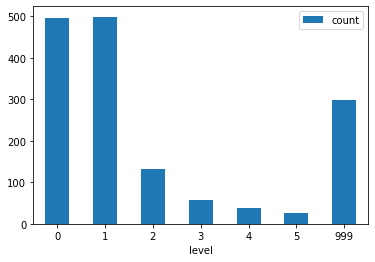

In [ ]:

result.plot(x='level', y='count', kind='bar', rot=0)